In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
pd.__version__

'0.23.4'

In [34]:
#from https://www.kaggle.com/blastchar/telco-customer-churn
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [36]:
for column in data.columns:
    print(column,data[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [37]:
#TotalCharges should be a number
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors="coerce")

In [38]:
data[data.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [39]:
#Nan for Total Charges is when the tenure is 0, 
pd.np.alltrue(data.TotalCharges.isna() == (data.tenure == 0))

True

In [40]:
#Replace Nan by 0
data.TotalCharges = data.TotalCharges.fillna(0)

In [41]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [42]:
columns_to_categorize = list(data.select_dtypes(include='object').columns)
columns_to_categorize.remove('customerID')
data_all_num = data.drop(labels=['customerID'], axis=1).copy()
for column in columns_to_categorize:
    data[column] = pd.Categorical( data[column])
    dfDummies = pd.get_dummies(data[column], prefix = column,drop_first=True)
    data_all_num.drop(labels=[column], axis=1,inplace=True)
    data_all_num = pd.concat([data_all_num,dfDummies], axis=1)
    

In [43]:
data_all_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


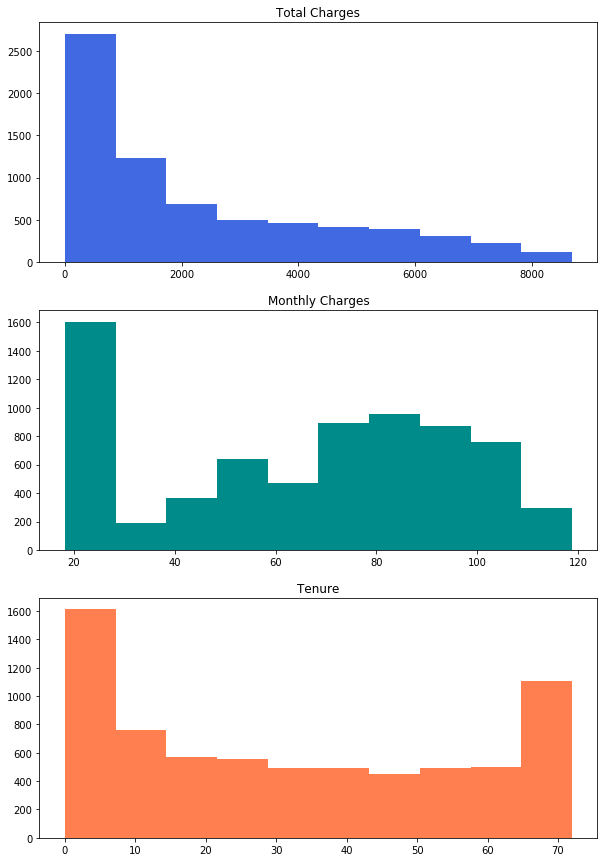

In [44]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist(data.TotalCharges,color='royalblue')
plt.title('Total Charges')
plt.subplot(3, 1, 2)
plt.hist(data.MonthlyCharges,color='darkcyan')
plt.title('Monthly Charges')
plt.subplot(3, 1, 3)
plt.hist(data.tenure,color="coral")
plt.title('Tenure')
plt.show()

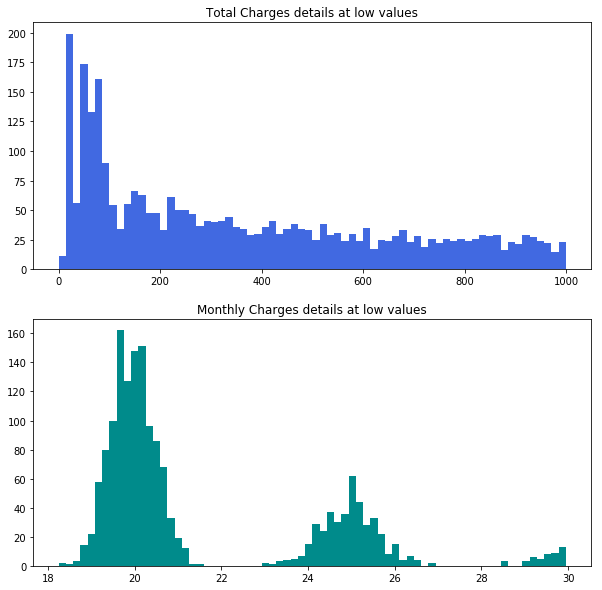

In [45]:
# Making sure the low values do not hide some bizarre value for Monthly Charges
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(data[data.TotalCharges<1000].TotalCharges,bins=70,color='royalblue') 
plt.title('Total Charges details at low values')


plt.subplot(2, 1, 2)
plt.hist(data[data.MonthlyCharges<30].MonthlyCharges,bins=70,color='darkcyan')
plt.title('Monthly Charges details at low values')

plt.show()

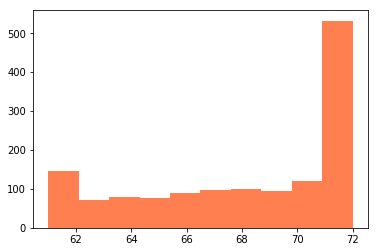

In [46]:
#The "peak" at 72 for tenure seems to look like a truncation of the tenure, would need to investigate.
plt.hist(data[data.tenure > 60].tenure,color="coral") 
plt.show()

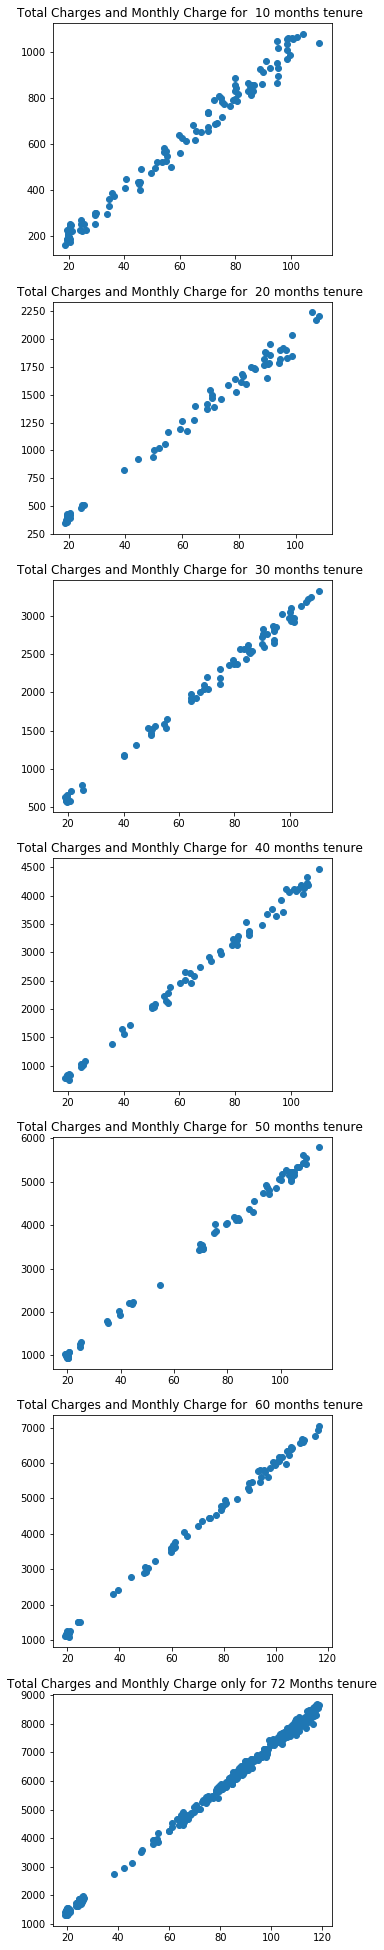

In [47]:
#No there is indeed a lot of people with a tenure of 72, 
#or this is the reference point for the data from 72 months ago.
#Even at 72 month tenure Total Charges are coherent with Monthly Charges
#When the model is sensitive to multicollinearity, like regression, we would need to exclude Total Charges.

min_tenure,max_tenure, tenure_step = 10,70,10
n_plot = (max_tenure-min_tenure)//tenure_step + 1
plt.figure(figsize=(5, 5*n_plot))
for (i,tenure) in enumerate(range(min_tenure,max_tenure,tenure_step)):
    this_tenure = data[data.tenure == tenure]
    plt.subplot(n_plot, 1, (i+1))
    plt.scatter(this_tenure.MonthlyCharges,this_tenure.TotalCharges)
    plt.title('Total Charges and Monthly Charge for  %s months tenure '%tenure)
    
plt.subplot(n_plot, 1, n_plot)
tenure_72 = data[data.tenure == 72]
plt.scatter(tenure_72.MonthlyCharges,tenure_72.TotalCharges)
plt.title('Total Charges and Monthly Charge only for 72 Months tenure')

plt.show()

In [48]:
#Indeed Total Charges are correlated with Montly Charges and tenure
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


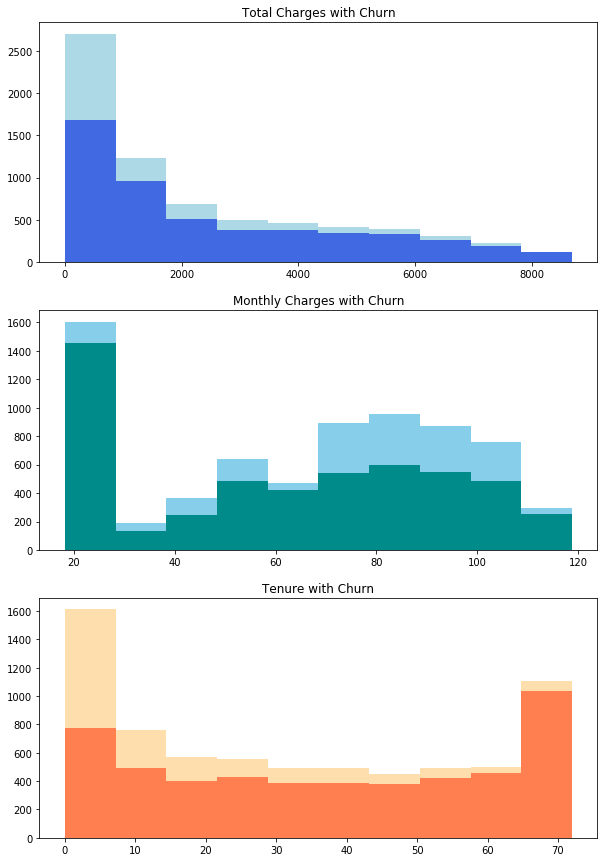

In [49]:
#Plotting including churn, there seems to be a highest churn for low tenure high monthly charges
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist([data[data.Churn=="No"].TotalCharges,[data[data.Churn=="Yes"].TotalCharges]],color=["royalblue","lightblue"],stacked=True) 
plt.title('Total Charges with Churn')
plt.subplot(3, 1, 2)
plt.hist([data[data.Churn=="No"].MonthlyCharges,[data[data.Churn=="Yes"].MonthlyCharges]],color=["darkcyan","skyblue"],stacked=True) 
plt.title('Monthly Charges with Churn')
plt.subplot(3, 1, 3)
plt.hist([data[data.Churn=="No"].tenure,[data[data.Churn=="Yes"].tenure]],color=["coral","navajowhite"],stacked=True) 
plt.title('Tenure with Churn')
plt.show()

plt.show()

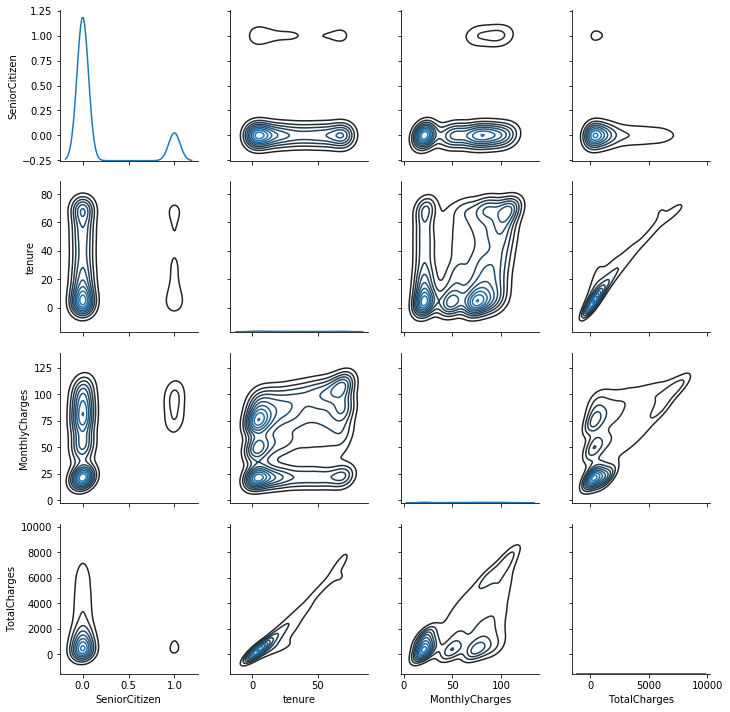

In [50]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=10);

In [51]:
data_all_num = data_all_num[['Churn_Yes'] + data_all_num.columns[:-1].tolist()]
all_corr= data_all_num.corr()

In [83]:
all_corr_sorted = all_corr.copy()
all_corr_sorted = all_corr_sorted.sort_values(by=['Churn_Yes'],ascending=False)

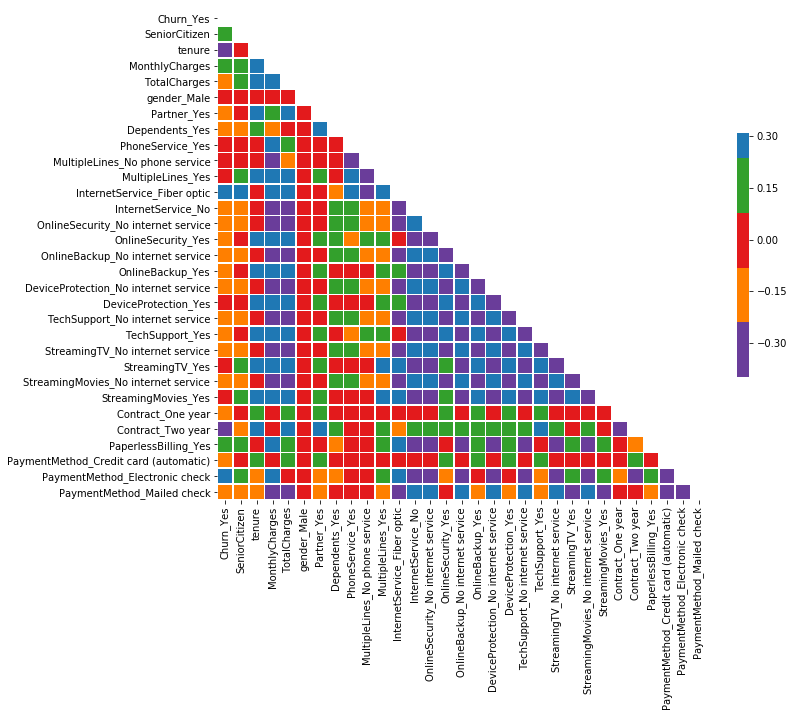

In [75]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = pd.np.zeros_like(all_corr, dtype=pd.np.bool)
mask[pd.np.triu_indices_from(mask)] = True

cmap = sns.mpl_palette("Paired_r", n_colors=5)

sns.heatmap(all_corr, mask=mask,cmap=cmap, vmax=.31, vmin = -.4,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

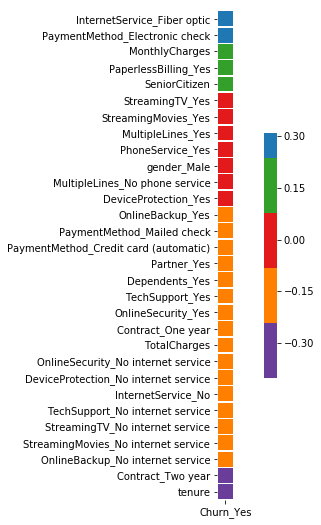

In [84]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(all_corr_sorted[all_corr_sorted.index != "Churn_Yes"][['Churn_Yes']],cmap=cmap,vmax=.31, vmin = -.4,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
all_corr_sorted[['Churn_Yes']]

,Churn_Yes
Churn_Yes,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService_Yes,0.011942
